Text(0.5, 1.0, 'Input image')

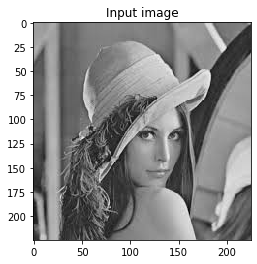

In [3]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
img = cv2.imread("grayscale.jpg")

plt.imshow(img)
plt.title("Input image")

Negative of the image

Text(0.5, 1.0, 'negative image')

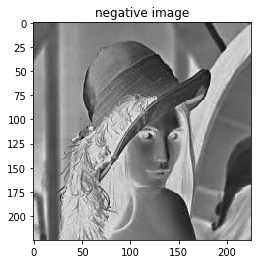

In [2]:
y = np.shape(img)
z = np.zeros(y)
z = 255- img

plt.imshow(z)
plt.title("negative image")

Constrast stretching of the same image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'constrast image')

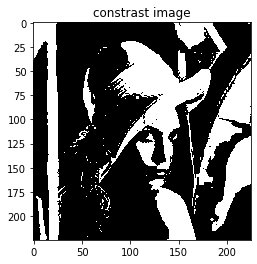

In [4]:
def contrast_stretch(pix, r1, s1, r2, s2):
    if (0<=pix and pix<=r1):
        return (s1/r1)*pix
    elif (r1<pix and pix<=r2):
        return ((s2-s1) /(r2 - r1))*(pix - r1) + s1
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
    
# Define parameters. 
r1 = 150
s1 = 0
r2 = 150
s2 = 255
contrast_vec = np.vectorize(contrast_stretch)

img_contrast  = contrast_vec(img, r1, s1, r2, s2)

plt.imshow(img_contrast)
plt.title("constrast image")

Intensity level Slicing

Text(0.5, 1.0, 'intensiy level sliced image')

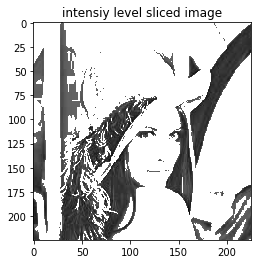

In [17]:
def intensity_level_slicing(pix, r1, r2, background = ""):
    if background =="with background":
        if (0<=pix and pix<r1):
            return pix
        elif(pix>=r1 and pix<=r2):
            pix = 255
            return pix
        else:
            return pix
    else:
        if (0<=pix and pix<r1):
            pix = 0
            return pix
        elif(pix>=r1 and pix<=r2):
            pix = 255
            return pix
        else:
            pix = 0
            return pix
# define params
r1 = 100
r2 = 255

intensity_level_vec = np.vectorize(intensity_level_slicing)

intensity_level_sliced_image = intensity_level_vec(img, r1, r2, "with background")

plt.imshow(intensity_level_sliced_image)
plt.title("intensiy level sliced image")